In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import re
import time
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

C:\Users\jenki\Desktop\Software Packages\Python\Anaconda\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jenki\Desktop\Software Packages\Python\Anaconda\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\jenki\Desktop\Software Packages\Python\Anaconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#Gather data
listings_df = pd.read_csv('data/listings.csv')
#displaying the first two records as examples to assess the variables
listings_df.iloc[0:2,:].T

,0,1
id,241032,953595
listing_url,https://www.airbnb.com/rooms/241032,https://www.airbnb.com/rooms/953595
scrape_id,20160104002432,20160104002432
last_scraped,2016-01-04,2016-01-04
name,Stylish Queen Anne Apartment,Bright & Airy Queen Anne Apartment
summary,NaN,Chemically sensitive? We've removed the irrita...
space,Make your self at home in this charming one-be...,"Beautiful, hypoallergenic apartment in an extr..."
description,Make your self at home in this charming one-be...,Chemically sensitive? We've removed the irrita...
experiences_offered,none,none
neighborhood_overview,NaN,"Queen Anne is a wonderful, truly functional vi..."


Keeping interesting columns

In [3]:
#The following variables may have an impact on the price a rental can charge, so these will be looked at
listings_keep_df = listings_df[['price','security_deposit','cleaning_fee','extra_people'
                                ,'minimum_nights','availability_30','guests_included'
                                ,'cancellation_policy','amenities','host_is_superhost'
                                ,'property_type','room_type','accommodates','bathrooms'
                                ,'bedrooms','beds','bed_type','number_of_reviews'
                                ,'review_scores_rating','review_scores_accuracy'
                                ,'review_scores_cleanliness','review_scores_checkin'
                                ,'review_scores_communication','review_scores_location'
                                ,'review_scores_value','neighbourhood_group_cleansed']].copy()
#Assess data types
listings_keep_df.dtypes

price                            object
security_deposit                 object
cleaning_fee                     object
extra_people                     object
minimum_nights                    int64
availability_30                   int64
guests_included                   int64
cancellation_policy              object
amenities                        object
host_is_superhost                object
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                         object
number_of_reviews                 int64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64


In [4]:
#Assessing the frequencies of the captured neighbourhoods
listings_keep_df["neighbourhood_group_cleansed"].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [5]:
#Assessing valid values for property type
listings_keep_df['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [6]:
#Assessing missing values
listings_keep_df.isnull().sum()/listings_keep_df.shape[0]

price                           0.000000
security_deposit                0.511262
cleaning_fee                    0.269775
extra_people                    0.000000
minimum_nights                  0.000000
availability_30                 0.000000
guests_included                 0.000000
cancellation_policy             0.000000
amenities                       0.000000
host_is_superhost               0.000524
property_type                   0.000262
room_type                       0.000000
accommodates                    0.000000
bathrooms                       0.004191
bedrooms                        0.001572
beds                            0.000262
bed_type                        0.000000
number_of_reviews               0.000000
review_scores_rating            0.169460
review_scores_accuracy          0.172342
review_scores_cleanliness       0.171032
review_scores_checkin           0.172342
review_scores_communication     0.170508
review_scores_location          0.171556
review_scores_va

#### Assessing other key columns with nulls to see if they are for niche types of accomodation (e.g. missing rooms for tents)



In [7]:
listings_keep_df[listings_keep_df['bathrooms'].isnull()].head()
#null bathrooms seem to be standard rooms, so are genuinely missing - will set to the mean below

,price,security_deposit,cleaning_fee,extra_people,minimum_nights,availability_30,guests_included,cancellation_policy,amenities,host_is_superhost,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,neighbourhood_group_cleansed
1242,$107.00,NaN,$96.00,$0.00,2,22,1,strict,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",f,Apartment,Entire home/apt,4,NaN,1.0,2.0,Real Bed,26,87.0,9.0,9.0,10.0,9.0,9.0,8.0,Downtown
1314,$135.00,NaN,$96.00,$0.00,2,24,1,strict,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",f,Apartment,Entire home/apt,4,NaN,1.0,2.0,Real Bed,13,87.0,9.0,9.0,9.0,9.0,9.0,8.0,Downtown
1357,$186.00,NaN,$107.00,$0.00,2,25,1,strict,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",f,Apartment,Entire home/apt,6,NaN,2.0,3.0,Real Bed,38,89.0,9.0,9.0,9.0,9.0,9.0,8.0,Downtown
1378,$149.00,$100.00,$88.00,$0.00,1,0,1,strict,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",f,Apartment,Entire home/apt,4,NaN,1.0,1.0,Real Bed,27,93.0,9.0,10.0,10.0,9.0,10.0,9.0,Downtown
1961,$280.00,NaN,NaN,$0.00,1,30,1,flexible,{},f,House,Private room,4,NaN,1.0,NaN,Real Bed,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other neighborhoods


In [8]:
listings_keep_df[listings_keep_df['bedrooms'].isnull()].head()
#null bedrooms seem to be standard rooms, so are genuinely missing - will set to the mean below

,price,security_deposit,cleaning_fee,extra_people,minimum_nights,availability_30,guests_included,cancellation_policy,amenities,host_is_superhost,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,neighbourhood_group_cleansed
1429,$80.00,NaN,$30.00,$25.00,1,25,2,strict,"{TV,Internet,""Wireless Internet"",""Wheelchair A...",f,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,170,94.0,9.0,10.0,10.0,10.0,10.0,9.0,Downtown
1492,$200.00,$500.00,$50.00,$0.00,1,30,1,strict,{},f,Apartment,Entire home/apt,6,1.0,NaN,1.0,Real Bed,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,Downtown
1493,$132.00,NaN,$64.00,$0.00,1,30,1,strict,"{""Cable TV"",Internet,""Wireless Internet"",Pool,...",f,Other,Entire home/apt,4,1.0,NaN,2.0,Real Bed,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,Downtown
1853,$95.00,$100.00,NaN,$0.00,2,30,2,strict,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",f,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,21,94.0,10.0,10.0,10.0,10.0,10.0,10.0,West Seattle
2619,$99.00,$175.00,NaN,$0.00,2,12,1,moderate,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",f,House,Entire home/apt,2,1.0,NaN,1.0,Real Bed,77,100.0,10.0,10.0,10.0,10.0,10.0,10.0,Capitol Hill


In [9]:
listings_keep_df[listings_keep_df['beds'].isnull()].head()
#There is only one with no value for beds - it has one room, a real bed, and accomodates 4 
#will set to the mean below

,price,security_deposit,cleaning_fee,extra_people,minimum_nights,availability_30,guests_included,cancellation_policy,amenities,host_is_superhost,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,neighbourhood_group_cleansed
1961,$280.00,NaN,NaN,$0.00,1,30,1,flexible,{},f,House,Private room,4,NaN,1.0,NaN,Real Bed,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other neighborhoods


In [10]:
#Assessing correlations between scores to see if we can drop some
cor = listings_keep_df[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness'
                       ,'review_scores_checkin','review_scores_communication','review_scores_location'
                       ,'review_scores_value']
                      ].corr()
cor

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_rating,1.000000,0.621257,0.642882,0.521813,0.540620,0.368423,0.696534
review_scores_accuracy,0.621257,1.000000,0.543345,0.407238,0.423189,0.267605,0.562878
review_scores_cleanliness,0.642882,0.543345,1.000000,0.398696,0.388146,0.277834,0.524354
review_scores_checkin,0.521813,0.407238,0.398696,1.000000,0.696345,0.240903,0.403263
review_scores_communication,0.540620,0.423189,0.388146,0.696345,1.000000,0.284635,0.463772
review_scores_location,0.368423,0.267605,0.277834,0.240903,0.284635,1.000000,0.368252
review_scores_value,0.696534,0.562878,0.524354,0.403263,0.463772,0.368252,1.000000


As expected the scores are all positively correlated with each other. Will just use the review_scores_rating metric 
because it is the most correlated with the other values so will preserve the most information

In [11]:
#Assessing what amenities are recorded
#The amenities have multiple values in a single cell seperated by commas.
#It is stored as a string, but has dictionary characters as well as quotations that need to be removed
all_amenities = []
for idx in range(listings_keep_df['amenities'].shape[0]):
    #removing unnessary characters and splitting the amenity string
    lst = (re.sub('("|{|})', "", listings_keep_df['amenities'][idx])).split(",")
    all_amenities.extend(lst)
amenity_counts = pd.Series(all_amenities).value_counts()
print("{0} unique amenities captured".format(len(amenity_counts)))
amenity_counts

42 unique amenities captured


Wireless Internet             3667
Heating                       3627
Kitchen                       3423
Smoke Detector                3281
Essentials                    3237
Dryer                         2997
Washer                        2992
Internet                      2811
Shampoo                       2670
TV                            2574
Carbon Monoxide Detector      2485
Fire Extinguisher             2196
Free Parking on Premises      2167
Family/Kid Friendly           1963
First Aid Kit                 1680
Cable TV                      1446
Indoor Fireplace               886
Pets live on this property     883
Hangers                        846
Elevator in Building           785
Hair Dryer                     774
Laptop Friendly Workspace      745
Iron                           742
Safety Card                    727
Air Conditioning               677
24-Hour Check-in               616
Buzzer/Wireless Intercom       538
Dog(s)                         509
Pets Allowed        

#### Cleaning data

In [12]:
def clean_data(df,amenity_counts):
    """
    Perform feature re-encoding and engineering for listings data.
    Extra columns are created called amenities_0 to amenities_n where n is the number of unique amenities in the dataframe
    A decode of what these are is returned by the function
    It can take a minute to assign the amenity dummy variables, so the function prints out the progress every 500 rows
    
    INPUT1: Listings DataFrame
    INPUT2: Series object with the unique amenities
    
    OUTPUT1: New dataframe containing cleaned and re-engineered columns
    OUTPUT2: Dataframe of the amenity counts, which corresponds to the columns amenity0 to amenityn
    """
    #Keeping initial columns
    df2 = df[['price','security_deposit','cleaning_fee','extra_people'
              ,'minimum_nights','availability_30','guests_included'
              ,'cancellation_policy','amenities','host_is_superhost'
              ,'property_type','room_type','accommodates','bathrooms'
              ,'bedrooms','beds','bed_type','number_of_reviews'
              ,'review_scores_rating','review_scores_accuracy'
              ,'review_scores_cleanliness','review_scores_checkin'
              ,'review_scores_communication','review_scores_location'
              ,'review_scores_value','neighbourhood_group_cleansed']].copy()
    
    #converting the columns with strings in currency format to floats
    string_to_float_cols = ['price','security_deposit','cleaning_fee','extra_people']
    for col in string_to_float_cols:
        df2[col] = df2[col].replace(regex=True
                                    ,inplace=False
                                    ,to_replace=r'(\$|,)'
                                    ,value=r'').astype(float)

    #creating a new boolean field to say whether the host is a superhost
    df2['superhost'] = np.where(df2['host_is_superhost']=='t', 1, 0)

    #grouping the property types into 'House','Apartment','B&B',' and 'other'
    df2['house'] = df2['property_type'].isin(['House','Townhouse','Bungalow'])
    df2['apartment'] = df2['property_type'].isin(['Apartment','Condominium'])
    df2['bnb'] = df2['property_type'] == 'Bed & Breakfast'
    df2['other_building'] = df2['property_type'].isin(
        ['House','Townhouse','Bungalow','Apartment','Condominium','Bed & Breakfast']) == False
    
    #Setting the individual amenity names to a dataframe and removing the missing value
    amenity_list = pd.DataFrame(amenity_counts.index)
    amenity_list.columns = ['amenities']
    #removing where there are no amenities listed
    amenity_list = amenity_list[amenity_list.amenities != ''].reset_index(drop=True)
    amenity_list['index'] = "amenities_" + amenity_list.index.astype(str)
    
    #Recording the column index that is the start of the amenity groups
    amenities_start_col_index = df2.shape[1]
    #creating a new column for each amenitiy
    new_amenity_cols = ["amenities_" + str(x) for x in range(amenity_list.shape[0])]
    for new_col in new_amenity_cols:
        df2[new_col] = 0
    
    #Assigning values of 1 where there is a match on amenity
    start_time = time.time()
    num_rows = df2.shape[0]
    for row_indexer, row in df2.iterrows():
        if row_indexer % 500 == 0:
            print("Amenity progress: {:.1%}".format(row_indexer/num_rows)
                  ,", Seconds since start",time.time() - start_time)
        for match_id, match_val in amenity_list.iterrows():
            if df2['amenities'][row_indexer].find(match_val[0]) > 0:
                df2.iloc[row_indexer,match_id + amenities_start_col_index] = 1
    
    
    #Dropping the columns that are no longer needed variable
    df2.drop([#Re-engineered columns
              'property_type','host_is_superhost','amenities'
              #Extra review scores
              ,'review_scores_accuracy','review_scores_cleanliness'
              ,'review_scores_checkin','review_scores_communication'
              ,'review_scores_location','review_scores_value'
               ]
              ,axis=1,inplace=True)
    
    #Adding dummy variables for categorical variables
    df2 = pd.get_dummies(df2)
    #Dropping additional fields to reduce multicollinearity
    df2.drop(['other_building',"cancellation_policy_moderate"
              ,"room_type_Entire home/apt","bed_type_Real Bed"
              ,"neighbourhood_group_cleansed_Other neighborhoods"
              ,'amenities_7','amenities_9'
              ]
              ,axis=1,inplace=True)
    #Dealing with missing values
    df2['cleaning_fee'] = df2['cleaning_fee'].fillna(0)
    df2['security_deposit'] = df2['security_deposit'].fillna(0)
    #Setting other columns to the mean where missing
    cols_mean_impute = ['bathrooms','bedrooms','beds','review_scores_rating' ]
    fill_mean = lambda col: col.fillna(col.mean())
    df2[cols_mean_impute] = df2[cols_mean_impute].apply(fill_mean, axis=0)
                   
    return df2, amenity_list

In [13]:
listings_cleaned_df, amenity_list = clean_data(listings_keep_df,amenity_counts)
print('')
print('Amenity List')
print(amenity_list)
print('')
print('Checking missing values have been dealt with')
print('All below should be zero')
print('')
print(listings_cleaned_df.isnull().sum())
print('')
print('Returned DF')
print('')
listings_cleaned_df.head()

Amenity progress: 0.0% , Seconds since start 0.018398284912109375
Amenity progress: 13.1% , Seconds since start 10.63845682144165
Amenity progress: 26.2% , Seconds since start 21.024657011032104
Amenity progress: 39.3% , Seconds since start 32.85097622871399
Amenity progress: 52.4% , Seconds since start 44.108646631240845
Amenity progress: 65.5% , Seconds since start 54.790241718292236
Amenity progress: 78.6% , Seconds since start 64.99114298820496
Amenity progress: 91.7% , Seconds since start 75.92304754257202

Amenity List
                     amenities         index
0            Wireless Internet   amenities_0
1                      Heating   amenities_1
2                      Kitchen   amenities_2
3               Smoke Detector   amenities_3
4                   Essentials   amenities_4
5                        Dryer   amenities_5
6                       Washer   amenities_6
7                     Internet   amenities_7
8                      Shampoo   amenities_8
9                  

,price,security_deposit,cleaning_fee,extra_people,minimum_nights,availability_30,guests_included,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,superhost,house,apartment,bnb,amenities_0,amenities_1,amenities_2,amenities_3,amenities_4,amenities_5,amenities_6,amenities_8,amenities_10,amenities_11,amenities_12,amenities_13,amenities_14,amenities_15,amenities_16,amenities_17,amenities_18,amenities_19,amenities_20,amenities_21,amenities_22,amenities_23,amenities_24,amenities_25,amenities_26,amenities_27,amenities_28,amenities_29,amenities_30,amenities_31,amenities_32,amenities_33,amenities_34,amenities_35,amenities_36,amenities_37,amenities_38,amenities_39,amenities_40,cancellation_policy_flexible,cancellation_policy_strict,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle
0,85.0,0.0,0.0,5.0,1,14,2,4,1.0,1.0,1.0,207,95.000000,0,False,True,False,1,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,150.0,100.0,40.0,0.0,2,13,1,4,1.0,1.0,1.0,43,96.000000,1,False,True,False,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,975.0,1000.0,300.0,25.0,4,1,10,11,4.5,5.0,7.0,20,97.000000,0,True,False,False,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,100.0,0.0,0.0,0.0,1,0,1,3,1.0,0.0,2.0,0,94.539262,0,False,True,False,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,450.0,700.0,125.0,15.0,1,30,6,6,2.0,3.0,3.0,38,92.000000,0,True,False,False,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
#Checking dogs have been assigned correctly, as a proxy to test all the other columns are correctly assigned
#Check the output for the 3 rows of amenities to make sure they contain the word dog in each
test = listings_keep_df[listings_cleaned_df['amenities_27'] == 1].reset_index(drop=True).copy()
print("(1)",test.amenities[0])
print("(2)",test.amenities[1])
print("(3)",test.amenities[2])

(1) {TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}
(2) {"Wireless Internet","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Essentials,Shampoo}
(3) {TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),"Indoor Fireplace","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Fire Extinguisher",Essentials,Shampoo}


Creating new dataframe with values scaled for modelling        
    

In [15]:
listings_scaled = listings_cleaned_df.copy()

cols_to_scale = ['security_deposit','cleaning_fee','extra_people','minimum_nights','availability_30'
               ,'guests_included','accommodates','bathrooms','bedrooms','beds','number_of_reviews'
               ,'review_scores_rating']
scaler = StandardScaler()
listings_scaled[cols_to_scale] = scaler.fit_transform(listings_scaled[cols_to_scale])
listings_scaled.head()

,price,security_deposit,cleaning_fee,extra_people,minimum_nights,availability_30,guests_included,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,superhost,house,apartment,bnb,amenities_0,amenities_1,amenities_2,amenities_3,amenities_4,amenities_5,amenities_6,amenities_8,amenities_10,amenities_11,amenities_12,amenities_13,amenities_14,amenities_15,amenities_16,amenities_17,amenities_18,amenities_19,amenities_20,amenities_21,amenities_22,amenities_23,amenities_24,amenities_25,amenities_26,amenities_27,amenities_28,amenities_29,amenities_30,amenities_31,amenities_32,amenities_33,amenities_34,amenities_35,amenities_36,amenities_37,amenities_38,amenities_39,amenities_40,cancellation_policy_flexible,cancellation_policy_strict,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle
0,85.0,-0.592215,-0.902932,-0.322324,-0.083987,-0.228908,0.249756,0.329029,-0.440484,-0.348649,-0.645546,4.897864,0.076542,0,False,True,False,1,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,150.0,-0.170908,-0.101445,-0.606680,-0.022651,-0.311063,-0.513098,0.329029,-0.440484,-0.348649,-0.645546,0.550724,0.242670,1,False,True,False,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,975.0,3.620858,5.108217,0.815098,0.100020,-1.296929,6.352583,3.869138,5.501253,4.183494,4.621394,-0.058936,0.408799,0,True,False,False,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,100.0,-0.592215,-0.902932,-0.606680,-0.083987,-1.379085,-0.513098,-0.176701,-0.440484,-1.481685,0.232277,-0.589075,0.000000,0,False,True,False,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,450.0,2.356936,1.601714,0.246387,-0.083987,1.085580,3.301169,1.340489,1.257155,1.917422,1.110101,0.418189,-0.421844,0,True,False,False,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
#Creating table decodes that can be used to undo the scaling after modelling
col_decodes = pd.DataFrame(cols_to_scale)
col_decodes.columns = ['col']

means = pd.DataFrame(scaler.mean_)
means.columns = ['mean']

sd = pd.DataFrame(scaler.scale_)
sd.columns = ['sd']
decodes = col_decodes.merge(means,how='left',left_index = True, right_index = True)
decodes = decodes.merge(sd,how='left',left_index = True, right_index = True)
#decodes = pd.DataFrame(colsToScale).merge(pd.DataFrame(scaler.mean_),how='left',left_index = True, right_index = True)

decodes

,col,mean,sd
0,security_deposit,140.566003,237.356444
1,cleaning_fee,45.062860,49.907261
2,extra_people,10.667627,17.583619
3,minimum_nights,2.369303,16.303767
4,availability_30,16.786276,12.172042
5,guests_included,1.672603,1.310868
6,accommodates,3.349398,1.977340
7,bathrooms,1.259469,0.589053
8,bedrooms,1.307712,0.882585
9,beds,1.735394,1.139181


### Looking to find the size of the uplift in income impact of accomodating more people

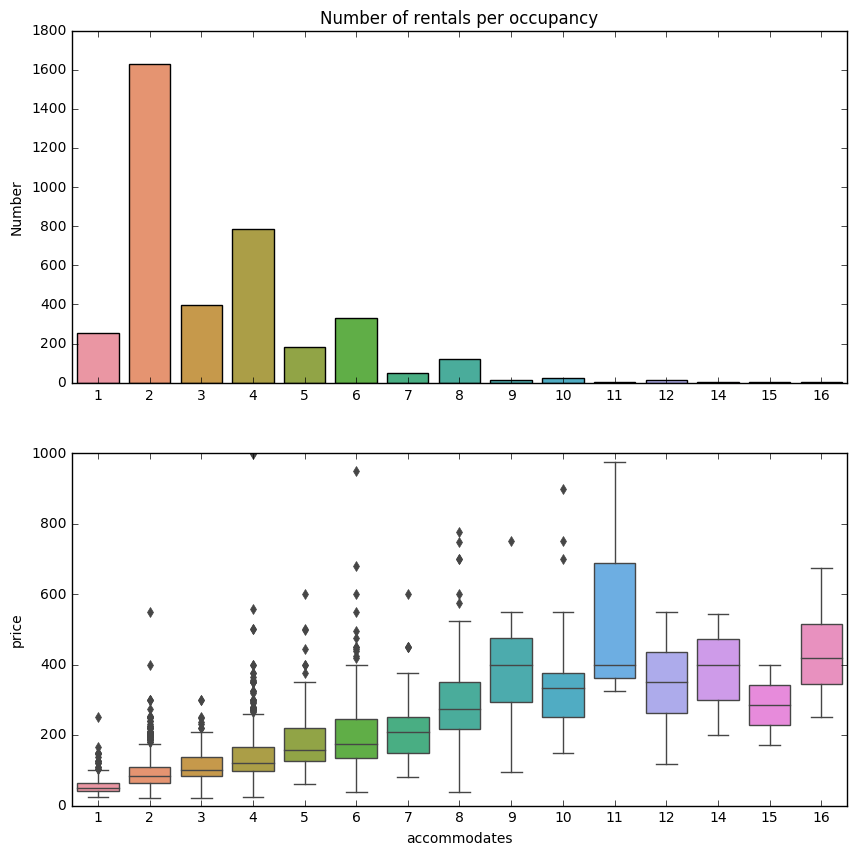

In [17]:
accom = pd.DataFrame(listings_cleaned_df["accommodates"].value_counts())
accom.columns = ['Number']
accom['Accommodates'] = accom.index
accom.sort_values(by = ['Accommodates'], ascending=True, inplace=True)

plt.figure(figsize=(10,10))
plt1 = plt.subplot(2,1,1)
ax = sns.barplot(x="Accommodates"
            , y="Number"
            , data=accom).set_title('Number of rentals per occupancy')

plt.subplot(2,1,2)
ax = sns.boxplot(x="accommodates"
            , y="price"
            , data=listings_cleaned_df)
plt1.set_xlabel('')
plt.show();
fig = ax.get_figure()
fig.savefig('picture_outputs\occupancy_graph.png')
plt.clf()

In [18]:
#Finding the actual means and jumps in price
accomodation_means = listings_cleaned_df[["accommodates","price"]].groupby(["accommodates"]).mean()
accomodation_means['change'] = accomodation_means["price"].diff() 
accomodation_means

,price,change
accommodates,,
1,58.375000,NaN
2,91.296865,32.921865
3,111.600503,20.303637
4,140.273885,28.673383
5,181.804348,41.530462
6,198.572289,16.767941
7,220.788462,22.216172
8,295.478992,74.690530
9,396.153846,100.674855


Properties that accomodate over 8 people are fairly rare, so robust conclusions cannot be taken for these.
There is however a big jump from 4 to 5.
For properties with two double rooms, it may therefore be worth while getting a sofa or camp bed, so that it can be used to accomodate 5 people.

### Create regression model to look at contribution to price of the different metrics

In [19]:
#Split into explanatory and response variables
X = listings_scaled.iloc[:,1:80]
y = listings_scaled['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state=42) 

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model was 0.628062863673062 on 382 values.'

Visually looking at how well the predictions were

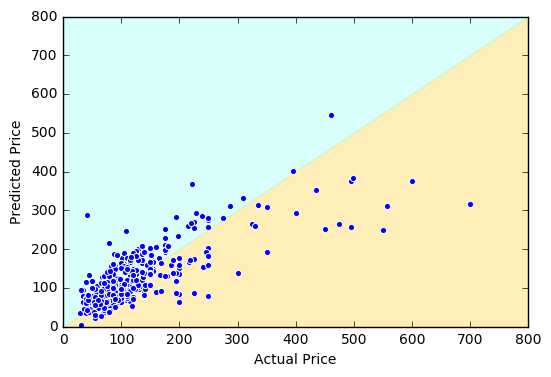

In [20]:
#Set background
back1 = plt.fill_between([0,800], [0,800], alpha=0.5)
back1.set_color('#ffde72')
back2 = plt.fill_between([0,800], [0,800], 800, alpha=0.5)
back2.set_color('#b3fff4')

ax = sns.scatterplot(x=y_test, y=y_test_preds)
ax.set(xlabel='Actual Price'
       , ylabel='Predicted Price'
       ,ylim=(0, 800)
       ,xlim=(0, 800)
      )

plt.show()

The model seems to under-predict the price for higher values. 

For our purposes however, this matches close enough

#### Getting a table with the dollar value of each contribution

In [21]:
#Getting column names
print("Intercept:",lm_model.intercept_)
coefNames = pd.DataFrame(X.columns)
coefNames.columns = ['Metric']

#Getting corresponding coefficients
coefVals = pd.DataFrame(lm_model.coef_)
coefVals.columns = ['Regression_coef_val']
#Merging with column names and sorting
coefNames = coefNames.merge(coefVals,left_index = True, right_index = True)
coefNames.sort_values(by = ['Regression_coef_val'], ascending=False, inplace=True)
#Merging on the amenity names
coefDecodes = coefNames.merge(amenity_list,how = 'left',left_on='Metric',right_on='index')
coefDecodes['Description'] = np.where(coefDecodes['amenities'].isnull(), coefDecodes['Metric'], coefDecodes['amenities'])
coefDecodes = coefDecodes[['Description','Regression_coef_val']]
coefDecodes

Intercept: 162.1774960305662


,Description,Regression_coef_val
0,Doorman,33.430777
1,neighbourhood_group_cleansed_Cascade,32.888818
2,neighbourhood_group_cleansed_Downtown,31.218542
3,neighbourhood_group_cleansed_Queen Anne,29.612967
4,neighbourhood_group_cleansed_Capitol Hill,27.897057
5,bedrooms,26.006683
6,neighbourhood_group_cleansed_Magnolia,24.821333
7,bathrooms,14.187615
8,accommodates,13.616808
9,Hot Tub,12.201721


For the scaled variables, the actual impact of the variable on the price is:
$coef\_val*\frac{(unit-mean)}{std}$

This can be re-written to be $\frac{coef\_val}{std}(unit) - \frac{coef\_val*mean}{std}$

$\frac{coef\_val*mean}{std}$ is a constant, thefore each increase in the unit increases the price by $\frac{coef\_val}{std}$

In [22]:
#Where scaling occured divide the coefficient by the standard deviation
new = coefDecodes.merge(decodes,how='left',left_on = 'Description',right_on='col')
new['mean'].fillna(0, inplace=True)
new['sd'].fillna(1, inplace=True)
new['reg_coeff_unscaled'] = new['Regression_coef_val']/new['sd']
new = new[['Description','Regression_coef_val','reg_coeff_unscaled']]
new.sort_values(by = ['reg_coeff_unscaled'], ascending=False, inplace=True)
new

,Description,Regression_coef_val,reg_coeff_unscaled
0,Doorman,33.430777,33.430777
1,neighbourhood_group_cleansed_Cascade,32.888818,32.888818
2,neighbourhood_group_cleansed_Downtown,31.218542,31.218542
3,neighbourhood_group_cleansed_Queen Anne,29.612967,29.612967
5,bedrooms,26.006683,29.466500
4,neighbourhood_group_cleansed_Capitol Hill,27.897057,27.897057
6,neighbourhood_group_cleansed_Magnolia,24.821333,24.821333
7,bathrooms,14.187615,24.085451
9,Hot Tub,12.201721,12.201721
11,cancellation_policy_flexible,9.467780,9.467780


In [23]:
new.to_excel('price_coefs.xlsx',index=False)

### Factors that boost income

In [24]:
new[new['reg_coeff_unscaled'] >= 5]

,Description,Regression_coef_val,reg_coeff_unscaled
0,Doorman,33.430777,33.430777
1,neighbourhood_group_cleansed_Cascade,32.888818,32.888818
2,neighbourhood_group_cleansed_Downtown,31.218542,31.218542
3,neighbourhood_group_cleansed_Queen Anne,29.612967,29.612967
5,bedrooms,26.006683,29.466500
4,neighbourhood_group_cleansed_Capitol Hill,27.897057,27.897057
6,neighbourhood_group_cleansed_Magnolia,24.821333,24.821333
7,bathrooms,14.187615,24.085451
9,Hot Tub,12.201721,12.201721
11,cancellation_policy_flexible,9.467780,9.467780


### Main factors that reduce income

In [26]:
new[new['reg_coeff_unscaled'] <= -5]

,Description,Regression_coef_val,reg_coeff_unscaled
63,Fire Extinguisher,-5.392231,-5.392231
64,24-Hour Check-in,-8.199050,-8.199050
65,neighbourhood_group_cleansed_Beacon Hill,-9.502621,-9.502621
66,neighbourhood_group_cleansed_Lake City,-9.753142,-9.753142
67,Washer,-10.021530,-10.021530
68,bnb,-10.249377,-10.249377
69,Hangers,-10.958540,-10.958540
70,Smoking Allowed,-11.401061,-11.401061
71,neighbourhood_group_cleansed_Seward Park,-14.398543,-14.398543
72,neighbourhood_group_cleansed_Delridge,-16.075943,-16.075943
